In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def initialize_centroids(df, k):
    centroids = df.sample(n=k, random_state=42).reset_index(drop=True)
    return centroids

def assign_clusters(df, centroids):
    distances = np.linalg.norm(df.values[:, np.newaxis] - centroids.values, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(df, labels, k):
    centroids = pd.DataFrame([df[labels == i].mean() for i in range(k)])
    return centroids

def k_means(df, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(df, k)
    for i in range(max_iters):
        labels = assign_clusters(df, centroids)
        new_centroids = update_centroids(df, labels, k)
        if np.all(np.abs(new_centroids - centroids).max() < tol):
            break
        centroids = new_centroids
    return centroids, labels

def calculate_correct_clustering_rate(labels, true_labels):
    correct = sum(labels == true_labels)
    return correct / len(labels)

In [2]:
df = pd.read_csv('Countries.csv')  # Replace with your file path
locations = df[['Longitude', 'Latitude']]
    
    # Optional: Scale the data
scaler = StandardScaler()
scaled_locations = pd.DataFrame(scaler.fit_transform(locations), columns=locations.columns)
    
    # Apply k-means clustering
k = 5  # You can choose the number of clusters as needed
centroids, labels = k_means(scaled_locations, k)

print("Centroids of the clusters:")
print(centroids)

FileNotFoundError: [Errno 2] No such file or directory: 'Countries.csv'

In [6]:
data.columns = data.columns.str.strip()
data.columns

Index(['Name', 'Club', 'Position', 'OVA', 'POT', 'ATT', 'SKI', 'MOV', 'POW',
       'MEN', 'DEF', 'GK', 'STATS'],
      dtype='object')

In [7]:
features = ["OVA","POT","SKI","POW","STATS"]
df = data.dropna(subset=features)
df = data[features].copy()
df

,OVA,POT,SKI,POW,STATS
0,91,94,81,82,"2,204"
1,91,94,70,86,"2,156"
2,91,91,89,82,"2,317"
3,90,90,93,77,"2,166"
4,90,90,82,82,"2,152"
...,...,...,...,...,...
95,84,84,87,81,"2,167"
96,84,84,84,70,"2,215"
97,84,86,70,83,"2,206"
98,84,84,23,52,"1,282"


In [ ]:
df["STATS"] = df["STATS"].str.replace(",", ".").astype(float)

In [12]:
df

,OVA,POT,SKI,POW,STATS
0,91,94,81,82,2.204
1,91,94,70,86,2.156
2,91,91,89,82,2.317
3,90,90,93,77,2.166
4,90,90,82,82,2.152
...,...,...,...,...,...
95,84,84,87,81,2.167
96,84,84,84,70,2.215
97,84,86,70,83,2.206
98,84,84,23,52,1.282


In [15]:
df = ((df - df.min()) / (df.max() - df.min())) * 10 + 1

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

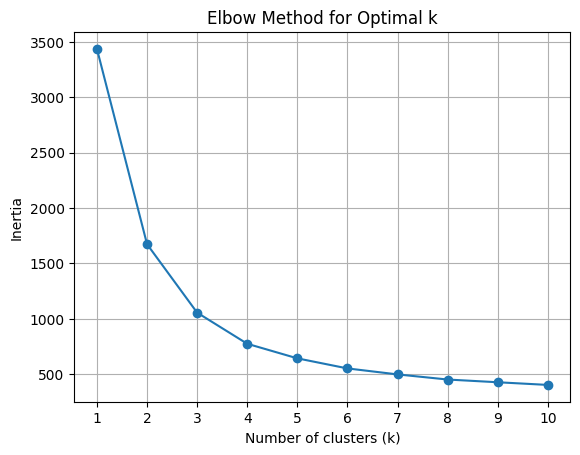

In [16]:
# Tính toán inertia cho mỗi giá trị k từ 1 đến 10
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show();